A research group in Computer Science at UBC has set up a MineCraft server in order to tackle the problem of predicting usage of a video game research server. By the provided data, the following question can be answered: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In [6]:
library(tidyverse)
table_1_data <- "players.csv"
table_1 <- read_csv(table_1_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
library(tidyverse)
table_2_data <- "sessions.csv"
table_2 <- read_csv(table_2_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


By observing both tables from the available datasets, we can conclude and narrow down what is useful to the intended investigation and tidy the data, making it easier to be analyzed, as well as excluding data that is not needed.

In [11]:
table_1_tidy <- read_csv("players.csv") |>
  select(-hashedEmail, -name)
table_1_tidy

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,47


In [13]:
table_2_tidy <- read_csv("sessions.csv") |>
  rename(hashed_email = hashedEmail) |>  # adjust names to your file
  mutate(
    start_time = dmy_hm(start_time),
    end_time   = dmy_hm(end_time),
    session_length_hours = as.numeric(difftime(end_time, start_time, units = "hours"))
  ) |>
  group_by(hashed_email) |>
  summarise(avg_session_length = mean(session_length_hours, na.rm = TRUE),
            session_count = n(),
            total_hours = sum(session_length_hours, na.rm = TRUE),
            .groups = "drop")
table_2_tidy

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashed_email,avg_session_length,session_count,total_hours
<chr>,<dbl>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,0.88333333,2,1.76666667
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.50000000,1,0.50000000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,0.18333333,1,0.18333333
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,0.53589744,13,6.96666667
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,0.58333333,2,1.16666667
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,0.16666667,1,0.16666667
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.83333333,1,0.83333333
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,0.49471545,41,20.28333333
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,0.30000000,1,0.30000000


To start, Table 1 includes the following data for 195 different individuals: 
- The experience of players
- Whether or not the players are subscribed to the sever
- Hashed emails 
- The number of hours played in that session 
- The name of players
- The age of players
- The gender of players

From looking into the data included in Table 1, it can be seen that the primary focus is on the characteristics of the individuals playing the server. The inclusion of playing habits while simultaneously looking at the difference of characteristics among those in the dataset suggest that trends and conclusions can be made by, for instance, by filtering the table in different ways such as by gender, as well as plotting it to visualize relationships.

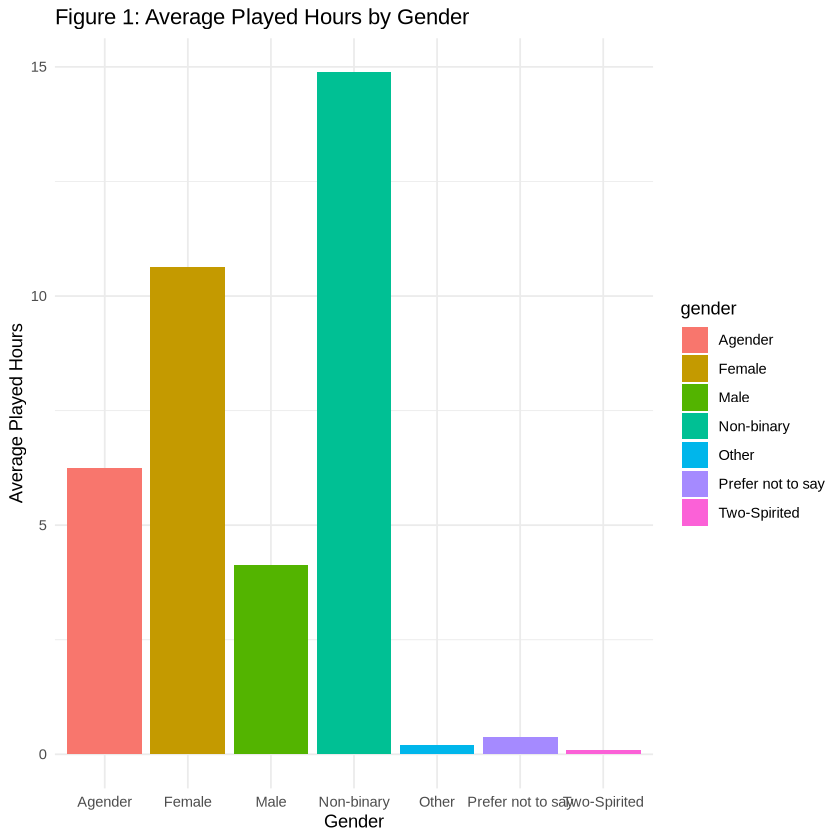

In [14]:
figure_1 <- ggplot(table_1_tidy, aes(x = gender, y = played_hours, fill = gender)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(
    x = "Gender",
    y = "Average Played Hours",
    title = "Figure 1: Average Played Hours by Gender"
  ) +
  theme_minimal()
figure_1

From comparing the genders of the individuals playing the game, we can see that those who are non-binary seem to spend the most amount of time on the game while those who are two-spirited play the least. This can be useful for those looking for individuals to play the game for things like marketing purposes. 
This graph is just one example of how table 1 can be used to observe similarities and differences. Another thing that can be observed is if there is a connection between the number of hours played to the experience of the player in order to determine whether or not being more exposed to the game makes an individual more experienced. 
Looking at the raw dataset for table 2, we can see that it includes the following data for 125 indiviuals:
- hashed email
- start time
- end time
- original start time
- original end time

However, table 2 just includes data as a total for each individual rather than each session of each individual. This data includes:
- hashed email
- average session length in hours
- number of sessions

This data gives more insight into trends around the lengths of sessions opposed to personal characteristics as table 1 does. 

To further investigate, the question of Can player characteristics predict subscriptions in players? will be examined. 
To answer this question, it would be reasonable to use the method of regression as the answer in search is to predict whether a 
player subscribes or not based on their experience level, age, gender, and the hours played. As a result, the graphs produced may
or may not indicate any sign of relationship between these characteristics and the act of subscribing; however, as this seems 
straight forward, there are potential weaknesses in using regression with this particular data. To start, primarily looking at 
table 1, due to the inclusion of subscriptions in the dataset, it will be difficult to present multiple numerical data pieces that
all influence the one scatterplot as that is the type of graph most commonly used to show relationships while simultaneously
predicting data. To minimize the presentation of this weakness, splitting of the data into training and testing sets can be applied to
model accuracy using cross-validation as well as precision and recall for even comparison. 